In [19]:
import numpy as np
import scipy.optimize as spo
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [106]:
def homogeneo(t,y,a):
    return a*y

def stiff_chapra(t,y,a,b,c):
    return homogeneo(t,y,a)+b+c*np.exp(-t)

In [107]:
def stiff_chapra_exact(t):
    return 3-0.998*np.exp(-1000*t)-2.002*np.exp(-t)

t_exact = np.arange(0,0.2,.0001)

In [108]:
def euler(func,rtiempo,h,ci,args=[]):
    a = args[0]
    b = args[1]
    c = args[2]
    tiempos = np.arange(rtiempo[0],rtiempo[1]+h,h)
    ysol = np.zeros(len(tiempos))
    ysol[0] = ci[0]
    for i,t in enumerate(tiempos[1:], 1):
        ysol[i] = ysol[i-1] + h*(func(t,ysol[i-1],a,b,c))
    return tiempos,ysol


In [109]:
def explorestiff(h):
    t,y = euler(stiff_chapra,[0,0.2],h,[0],[-1000,3000,-2000])
    print("h= ",h)
    plt.plot(t,y,'--b',t_exact,stiff_chapra_exact(t_exact),'-k')

In [110]:
interact(explorestiff, h=(0.0001, 0.01, 0.0001));

interactive(children=(FloatSlider(value=0.005, description='h', max=0.01, min=0.0001, step=0.0001), Output()),…

In [111]:
def implicit_euler(func,rtiempo,h,ci,args=[]):
    a = args[0]
    b = args[1]
    c = args[2]
    tiempos = np.arange(rtiempo[0],rtiempo[1]+h,h)
    ysol = np.zeros(len(tiempos))
    ysol[0] = ci[0]
    for i,t in enumerate(tiempos[1:], 1):
        def euler_func(y):
            return ysol[i-1] + h*(func(t,y,a,b,c)) - y
        ysol[i] = spo.fsolve(euler_func,ysol[i-1])
    return tiempos,ysol

In [112]:
def explorestiff_imp(h):
    t,y = implicit_euler(stiff_chapra,[0,0.2],h,[0],[-1000,3000,-2000])
    print("h= ",h)
    plt.plot(t,y,'--b',t_exact,stiff_chapra_exact(t_exact),'-k')

In [113]:
interact(explorestiff_imp, h=(0.0001, 0.05, 0.0001));

interactive(children=(FloatSlider(value=0.025, description='h', max=0.05, min=0.0001, step=0.0001), Output()),…

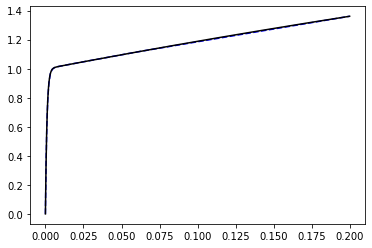

In [114]:
sol = solve_ivp(stiff_chapra, [0,0.2],[0],method='Radau',args=[-1000,3000,-2000])
plt.plot(sol.t,sol.y[0],'--b',t_exact,stiff_chapra_exact(t_exact),'-k')

In [115]:
sol.t

array([0.00000000e+00, 1.00000000e-04, 4.25248660e-04, 9.07508377e-04,
       1.52632265e-03, 2.29439531e-03, 3.25057506e-03, 4.47251567e-03,
       6.11540583e-03, 8.52510980e-03, 1.26476990e-02, 2.21732453e-02,
       6.17832185e-02, 2.00000000e-01])

In [126]:
def stiff(t,y,lamb):
    return lamb*(y-np.cos(t))-np.sin(t)

def stiff_exact(t,lamb, t0, eta):
    return np.exp(lamb*(t-t0))*(eta-np.cos(t0))+np.cos(t)

t_exact = np.arange(0,10,.1)

In [142]:
def euler(func,rtiempo,h,ci,args=[]):
    a = args[0]
    tiempos = np.arange(rtiempo[0],rtiempo[1]+h,h)
    ysol = np.zeros(len(tiempos))
    ysol[0] = ci[0]
    for i,t in enumerate(tiempos[1:], 1):
        ysol[i] = ysol[i-1] + h*(func(t,ysol[i-1],a))
    return tiempos,ysol

def explorestiff(h):
    t0 = 0
    eta = 2
    la = -10
    t,y = euler(stiff,[t0,10],h,[eta],[la])
    print("h= ",h)
    plt.plot(t,y,'--b',t_exact,stiff_exact(t_exact,la, t0, eta),'-k')

interact(explorestiff, h=(0.01, 0.5, 0.01));

interactive(children=(FloatSlider(value=0.25, description='h', max=0.5, min=0.01, step=0.01), Output()), _dom_…

In [144]:
def implicit_euler(func,rtiempo,h,ci,args=[]):
    a = args[0]
    tiempos = np.arange(rtiempo[0],rtiempo[1]+h,h)
    ysol = np.zeros(len(tiempos))
    ysol[0] = ci[0]
    for i,t in enumerate(tiempos[1:], 1):
        def euler_func(y):
            return ysol[i-1] + h*(func(t,y,a)) - y
        ysol[i] = spo.fsolve(euler_func,ysol[i-1])
    return tiempos,ysol

def explorestiff_imp(h):
    t0 = 0
    eta = 2
    la = -10
    t,y = implicit_euler(stiff,[t0,10],h,[eta],[la])
    print("h= ",h)
    plt.plot(t,y,'--b',t_exact,stiff_exact(t_exact,la, t0, eta),'-k')
    
interact(explorestiff_imp, h=(0.01, 0.5, 0.01));

interactive(children=(FloatSlider(value=0.25, description='h', max=0.5, min=0.01, step=0.01), Output()), _dom_…

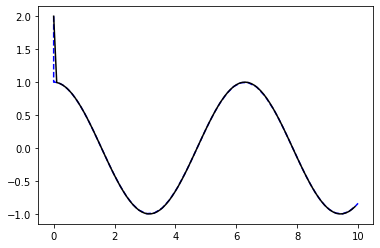

In [153]:
t0 = 0
eta = 2
la = -1e6
sol = solve_ivp(stiff, [t0,10],[eta],method='LSODA',args=[la])
plt.plot(sol.t,sol.y[0],'--b',t_exact,stiff_exact(t_exact,la,t0,eta),'-k')